In [1]:
import numpy as np
import pandas as pd

# pandas display settings
pd.set_option('max_rows', 250)
pd.set_option('max_columns', 250)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load the data
table1 = pd.read_csv('./data/Covid_deaths.csv')

table1.head()

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2/24/2020,38928341.0,1.0,1.0,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,38928341.0,1.0,0.0,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,38928341.0,1.0,0.0,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,38928341.0,1.0,0.0,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,38928341.0,1.0,0.0,NaN,NaN


### Clean the data
* Drop the records with missing continent.
* Replace null values in numerical columns with 0.
* Replace null values in categorical columns with 'NULL'.
* Convert to the appropriate data types

In [3]:
t_1 = table1.copy()

# Drop missing values
t_1 = t_1.dropna(subset=['continent'])

cols = ['population', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']
# replace missing values with '0'
for col in cols:
    t_1[col] = np.where(pd.isna(t_1[col]) == True, 0, t_1[col])

# replace missing values with 'NULL'
for col in ['iso_code', 'continent', 'location']:
    t_1[col] = np.where(pd.isna(t_1[col]) == True, 'NULL', t_1[col])    
    
# convert to the appropriate data types
for col in cols:
    t_1[col] = t_1[col].apply(lambda x: int(x))  

# convert to datetime
t_1['date'] = pd.to_datetime(t_1['date'])
    

        
# verify    
t_1.head() 

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,38928341,1,1,0,0
1,AFG,Asia,Afghanistan,2020-02-25,38928341,1,0,0,0
2,AFG,Asia,Afghanistan,2020-02-26,38928341,1,0,0,0
3,AFG,Asia,Afghanistan,2020-02-27,38928341,1,0,0,0
4,AFG,Asia,Afghanistan,2020-02-28,38928341,1,0,0,0


### Create Database

In [4]:
# load the data
table2 = pd.read_csv('./data/Covid_Vaccinations.csv')

table2.head()

,iso_code,continent,location,date,new_tests,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511


### Clean the data
* Drop the records with missing continent.
* Replace null values in numerical columns with 0.
* Replace null values in categorical columns with 'NULL'.
* Convert to the appropriate data types

In [5]:
t_2 = table2.copy()

# Drop missing values
t_2 = t_2.dropna(subset=['continent'])

cols = ['new_tests', 'total_tests', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'] 

# replace missing values with '0'
for col in cols:
    t_2[col] = np.where(pd.isna(t_2[col]) == True, 0, t_2[col])

# replace missing values with 'NULL'
for col in ['iso_code', 'continent', 'location']:
    t_2[col] = np.where(pd.isna(t_2[col]) == True, 'NULL', t_2[col])    
    
# convert to the appropriate data types
for col in ['new_tests', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',]:
    t_2[col] = t_2[col].apply(lambda x: int(x))  

# convert to datetime
t_2['date'] = pd.to_datetime(t_2['date'])
        
# verify    
t_2.head() 

,iso_code,continent,location,date,new_tests,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511


### EDA

In [6]:
t_1.head()

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,38928341,1,1,0,0
1,AFG,Asia,Afghanistan,2020-02-25,38928341,1,0,0,0
2,AFG,Asia,Afghanistan,2020-02-26,38928341,1,0,0,0
3,AFG,Asia,Afghanistan,2020-02-27,38928341,1,0,0,0
4,AFG,Asia,Afghanistan,2020-02-28,38928341,1,0,0,0


In [7]:
# group by 'Countries'
covid_deaths = t_1.groupby(['location'])[['continent', 'population', 'total_cases', 'total_deaths']].agg(['max'])

# reset the index
covid_deaths = covid_deaths.reset_index()
# rename columns
covid_deaths.columns = ['country', 'continent', 'population', 'total_cases', 'total_deaths']
# make a copy
c_deaths = covid_deaths.copy()
covid_deaths.head(20)

,country,continent,population,total_cases,total_deaths
0,Afghanistan,Asia,38928341,80841,3187
1,Albania,Europe,2877800,132384,2452
2,Algeria,Africa,43851043,131283,3527
3,Andorra,Europe,77265,13777,127
4,Angola,Africa,32866268,35854,800
5,Anguilla,North America,15002,0,0
6,Antigua and Barbuda,North America,97928,1263,42
7,Argentina,South America,45195777,3977634,81946
8,Armenia,Asia,2963234,223212,4463
9,Aruba,North America,106766,0,0


#### Which country had the highest Covid cases?

In [8]:
a = covid_deaths.sort_values(by='total_cases', ascending=False).head(10)
a

,country,continent,population,total_cases,total_deaths
209,United States,North America,331002647,33378096,597952
91,India,Asia,1380004385,28996473,351309
27,Brazil,South America,212559409,16984218,474414
70,France,Europe,67564251,5978650,110224
201,Turkey,Asia,84339067,5293627,48255
162,Russia,Europe,145934460,5076543,122037
208,United Kingdom,Europe,67886004,4538399,128104
98,Italy,Europe,60461828,4233698,126588
7,Argentina,South America,45195777,3977634,81946
75,Germany,Europe,83783945,3710342,89390


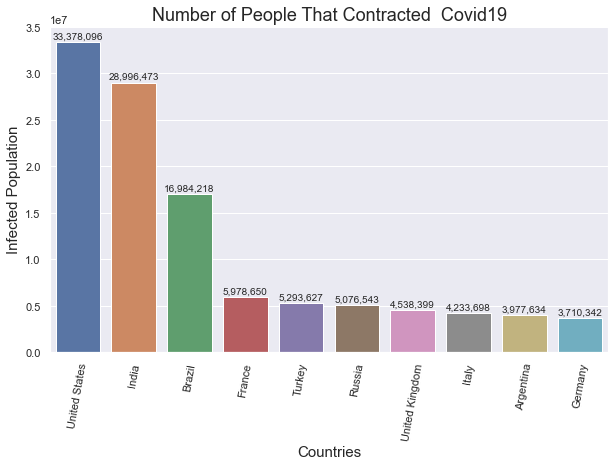

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='total_cases', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Countries', size=15)
plt.ylabel('Infected Population', size=15)
plt.title('Number of People That Contracted  Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y):,}",               # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

#### Which country had the highest Covid infection rate?

In [10]:
def inf_rate(df: pd.DataFrame):
    """ It calculates the infection rate. It returns a float. """
    population, total_cases = df['population'], df['total_cases']
    
    if (population != 0) and (total_cases != 0):
        result = round(total_cases * 100 / population, 2)
    else:
        result = 0  # population or total_cases is 0                                                
    return result


def death_rate(df: pd.DataFrame):
    """ It calculates the death rate. It returns a float. """
    total_cases, total_deaths = df['total_cases'], df['total_deaths']
    
    if (total_cases != 0) and (total_deaths != 0):
        result = round(total_deaths * 100 / total_cases, 2)
    else:
        result = 0  # total_deaths or total_cases is 0                                                
    return result

def vacc_rate(df: pd.DataFrame):
    """ It calculates the vaccination rate. It returns a float. """
    population, people_vacc = df['population'], df['people_fully_vaccinated']
    
    if (population != 0) and (people_vacc != 0):
        result = round(people_vacc * 100 / population, 2)
    else:
        result = 0  # population or total_cases is 0                                                
    return result

In [11]:
# calculate the infection rate
covid_deaths['infection_rate'] = covid_deaths.apply(inf_rate, axis='columns')
# sort by the infection rate
a = covid_deaths.sort_values(by='infection_rate', ascending=False).head(10)
a

,country,continent,population,total_cases,total_deaths,infection_rate
3,Andorra,Europe,77265,13777,127,17.83
133,Montenegro,Europe,628062,99834,1594,15.90
52,Czechia,Europe,10708982,1663607,30164,15.53
169,San Marino,Europe,33938,5090,90,15.00
14,Bahrain,Asia,1701583,252600,1143,14.85
174,Seychelles,Africa,98340,12466,46,12.68
122,Maldives,Asia,540542,68502,187,12.67
179,Slovenia,Europe,2078932,255432,4390,12.29
117,Luxembourg,Europe,625976,70256,818,11.22
189,Sweden,Europe,10099270,1078062,14523,10.67


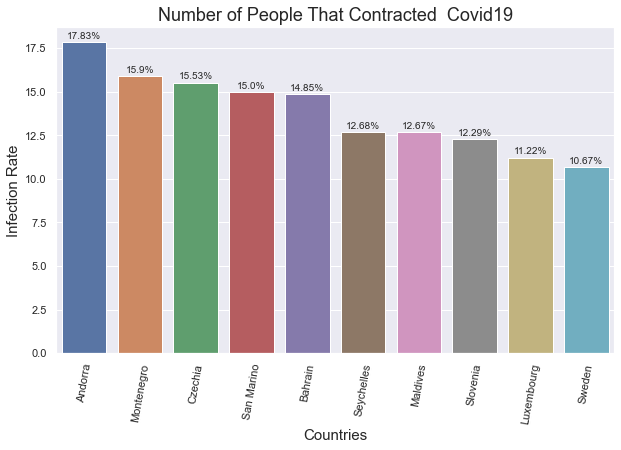

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='infection_rate', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Countries', size=15)
plt.ylabel('Infection Rate', size=15)
plt.title('Number of People That Contracted  Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y, 2):,}%",           # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

#### Which country had the highest
* Covid deaths?
* Covid death rate?

In [13]:
# Covid deaths
a = covid_deaths.sort_values(by='total_deaths', ascending=False).head(10)
a

,country,continent,population,total_cases,total_deaths,infection_rate
209,United States,North America,331002647,33378096,597952,10.08
27,Brazil,South America,212559409,16984218,474414,7.99
91,India,Asia,1380004385,28996473,351309,2.10
128,Mexico,North America,128932753,2434562,228838,1.89
156,Peru,South America,32971846,1983570,186511,6.02
208,United Kingdom,Europe,67886004,4538399,128104,6.69
98,Italy,Europe,60461828,4233698,126588,7.00
162,Russia,Europe,145934460,5076543,122037,3.48
70,France,Europe,67564251,5978650,110224,8.85
42,Colombia,South America,50882884,3593016,92496,7.06


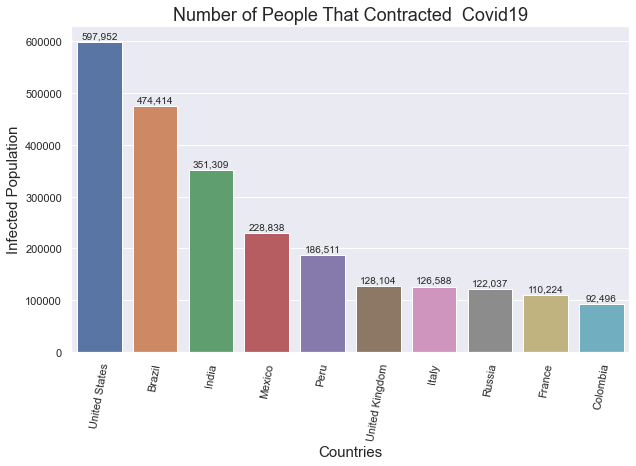

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='total_deaths', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Countries', size=15)
plt.ylabel('Infected Population', size=15)
plt.title('Number of People That Contracted  Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y):,}",               # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

In [15]:
# calculate the Covid death rate
covid_deaths['death_rate'] = covid_deaths.apply(death_rate, axis='columns')
# sort by the death raate
a = covid_deaths.sort_values(by='death_rate', ascending=False).head(10)
a

,country,continent,population,total_cases,total_deaths,infection_rate,death_rate
212,Vanuatu,Oceania,307150,4,1,0.00,25.00
217,Yemen,Asia,29825968,6812,1336,0.02,19.61
156,Peru,South America,32971846,1983570,186511,6.02,9.40
128,Mexico,North America,128932753,2434562,228838,1.89,9.40
187,Sudan,Africa,43849269,36004,2697,0.08,7.49
191,Syria,Asia,17500657,24680,1796,0.14,7.28
59,Egypt,Africa,102334403,268754,15399,0.26,5.73
181,Somalia,Africa,15893219,14768,773,0.09,5.23
41,China,Asia,1439323774,91351,4636,0.01,5.07
58,Ecuador,South America,17643060,432739,20814,2.45,4.81


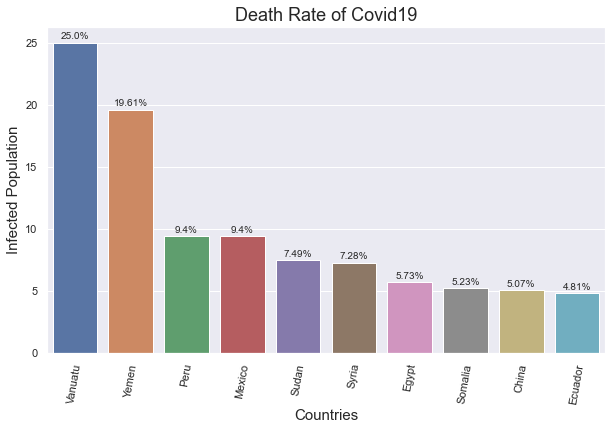

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='death_rate', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Countries', size=15)
plt.ylabel('Infected Population', size=15)
plt.title('Death Rate of Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y, 2):,}%",           # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

#### Which Continent had the highest
* Infection rate?
* Covid deaths?
* Covid death rate?

In [17]:
continents = c_deaths.groupby(['continent'])[['population', 'total_cases', 'total_deaths']].agg(['sum'])
# reset the index
continents = continents.reset_index()
# rename columns
continents.columns = ['continent', 'population', 'total_cases', 'total_deaths']

continents

,continent,population,total_cases,total_deaths
0,Africa,1338832662,4930955,132588
1,Asia,4614068610,52585290,713778
2,Europe,750796949,47404642,1082305
3,North America,588277210,39096590,887715
4,Oceania,42375212,50056,1105
5,South America,430461090,29766127,919460


In [18]:
# Highest infection rate
continents['infection_rate'] = continents.apply(inf_rate, axis='columns')
# sort by the infection rate
a = continents.sort_values(by='infection_rate', ascending=False)
a

,continent,population,total_cases,total_deaths,infection_rate
5,South America,430461090,29766127,919460,6.91
3,North America,588277210,39096590,887715,6.65
2,Europe,750796949,47404642,1082305,6.31
1,Asia,4614068610,52585290,713778,1.14
0,Africa,1338832662,4930955,132588,0.37
4,Oceania,42375212,50056,1105,0.12


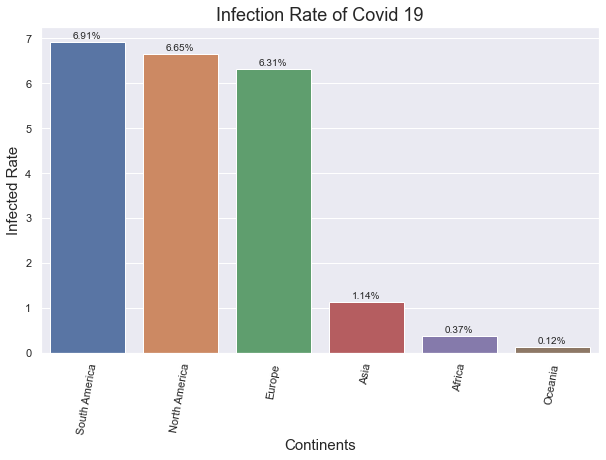

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='continent', y='infection_rate', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Continents', size=15)
plt.ylabel('Infected Rate', size=15)
plt.title('Infection Rate of Covid 19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y, 2):,}%",           # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

In [20]:
# Covid deaths
a = continents.sort_values(by='total_deaths', ascending=False)
a

,continent,population,total_cases,total_deaths,infection_rate
2,Europe,750796949,47404642,1082305,6.31
5,South America,430461090,29766127,919460,6.91
3,North America,588277210,39096590,887715,6.65
1,Asia,4614068610,52585290,713778,1.14
0,Africa,1338832662,4930955,132588,0.37
4,Oceania,42375212,50056,1105,0.12


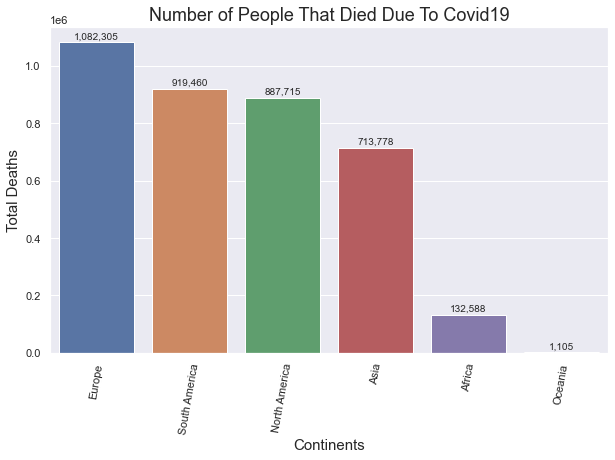

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='continent', y='total_deaths', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Continents', size=15)
plt.ylabel('Total Deaths', size=15)
plt.title('Number of People That Died Due To Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y):,}",               # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

In [22]:
# calculate the Covid death rate
continents['death_rate'] = continents.apply(death_rate, axis='columns')
# sort by the death rate
a =continents.sort_values(by='death_rate', ascending=False)
a

,continent,population,total_cases,total_deaths,infection_rate,death_rate
5,South America,430461090,29766127,919460,6.91,3.09
0,Africa,1338832662,4930955,132588,0.37,2.69
2,Europe,750796949,47404642,1082305,6.31,2.28
3,North America,588277210,39096590,887715,6.65,2.27
4,Oceania,42375212,50056,1105,0.12,2.21
1,Asia,4614068610,52585290,713778,1.14,1.36


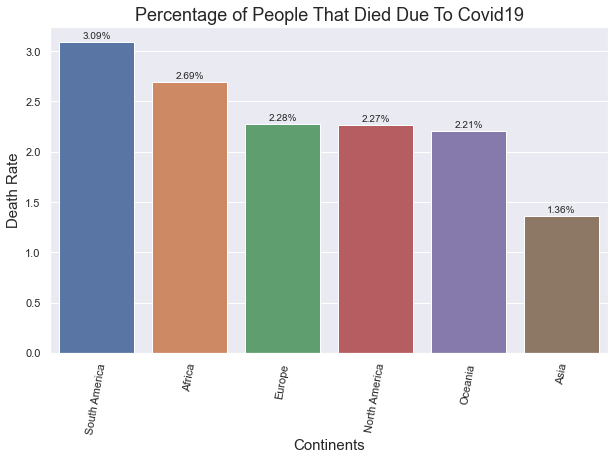

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='continent', y='death_rate', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Continents', size=15)
plt.ylabel('Death Rate', size=15)
plt.title('Percentage of People That Died Due To Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y, 2):,}%",           # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

In [24]:
t_2.head()

,iso_code,continent,location,date,new_tests,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,0,0,0.0,0.0,0,0,0,0,0,8.33,54.422,18.6,2.581,1.337,1803.987,37.746,0.5,64.83,0.511


In [25]:
vaccination = t_2.groupby(['location'])[['continent', 'total_tests', 'total_vaccinations', 'people_fully_vaccinated']].agg(['max'])

# reset the index
vaccination = vaccination.reset_index()
# rename columns
vaccination.columns = ['country', 'continent', 'total_tests', 'total_vaccinations', 'people_fully_vaccinated']

vaccination.head(10)

,country,continent,total_tests,total_vaccinations,people_fully_vaccinated
0,Afghanistan,Asia,0,630305,148505
1,Albania,Europe,718515,803682,310336
2,Algeria,Africa,0,2500000,0
3,Andorra,Europe,191856,35916,8303
4,Angola,Africa,0,909215,230181
5,Anguilla,North America,0,14443,5439
6,Antigua and Barbuda,North America,0,55578,21494
7,Argentina,South America,10156324,14336164,3045696
8,Armenia,Asia,1104999,33529,0
9,Aruba,North America,0,117036,52852


In [26]:
# add the population
vaccination = vaccination.join(c_deaths['population'])
vaccination.head()

,country,continent,total_tests,total_vaccinations,people_fully_vaccinated,population
0,Afghanistan,Asia,0,630305,148505,38928341
1,Albania,Europe,718515,803682,310336,2877800
2,Algeria,Africa,0,2500000,0,43851043
3,Andorra,Europe,191856,35916,8303,77265
4,Angola,Africa,0,909215,230181,32866268


#### Which country has taken the most covid tests?
* Number

In [27]:
# Most tests
a = vaccination.sort_values(by='total_tests', ascending=False).head(10)
a

,country,continent,total_tests,total_vaccinations,people_fully_vaccinated,population
209,United States,North America,451911067,302851917,139748661,331002647
91,India,Asia,364746522,230490652,44989073,1380004385
208,United Kingdom,Europe,185147729,68381870,27921294,67886004
41,China,Asia,160000000,794134000,0,1439323774
162,Russia,Europe,140875265,31050172,13376931,145934460
98,Italy,Europe,67412074,38761223,13190876,60461828
75,Germany,Europe,61311193,55546616,18187186,83783945
201,Turkey,Asia,55673616,31246323,13258481,84339067
207,United Arab Emirates,Asia,51923942,13347300,3836521,9890400
11,Austria,Europe,45278379,5714006,1834165,9006400


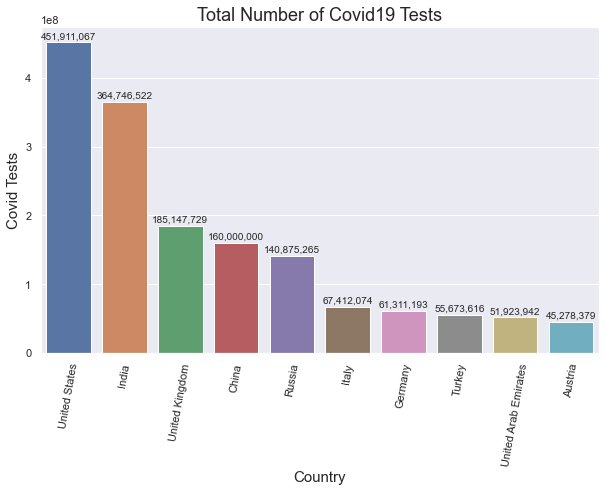

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='total_tests', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Country', size=15)
plt.ylabel('Covid Tests', size=15)
plt.title('Total Number of Covid19 Tests', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y):,}",               # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

#### Which country has vaccinated the most?
* Number

In [29]:
# Most vaccinations
a = vaccination.sort_values(by='total_vaccinations', ascending=False).head(10)
a

,country,continent,total_tests,total_vaccinations,people_fully_vaccinated,population
41,China,Asia,160000000,794134000,0,1439323774
209,United States,North America,451911067,302851917,139748661,331002647
91,India,Asia,364746522,230490652,44989073,1380004385
27,Brazil,South America,31716527,71691137,22889039,212559409
208,United Kingdom,Europe,185147729,68381870,27921294,67886004
75,Germany,Europe,61311193,55546616,18187186,83783945
70,France,Europe,0,40237289,12634856,67564251
98,Italy,Europe,67412074,38761223,13190876,60461828
128,Mexico,North America,6701075,34600289,14172467,128932753
201,Turkey,Asia,55673616,31246323,13258481,84339067


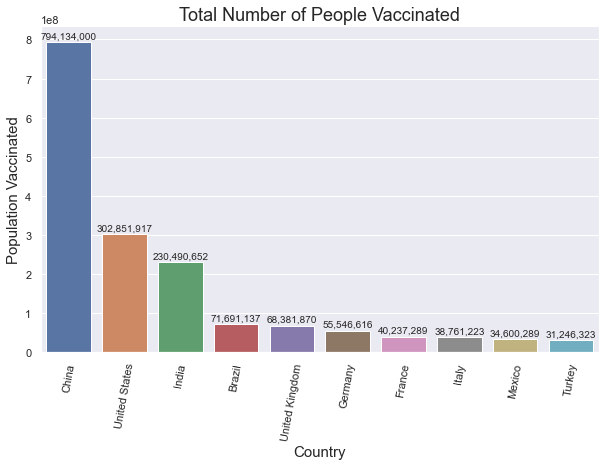

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='total_vaccinations', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Country', size=15)
plt.ylabel('Population Vaccinated', size=15)
plt.title('Total Number of People Vaccinated', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y):,}",               # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()

#### Which country has fully vaccinated the most?
* Rate

In [31]:
vaccination['vaccination_rate'] = vaccination.apply(vacc_rate, axis='columns')
a = vaccination.sort_values(by='vaccination_rate', ascending=False).head(10)
a

,country,continent,total_tests,total_vaccinations,people_fully_vaccinated,population,vaccination_rate
77,Gibraltar,Europe,0,77717,38619,33691,114.63
174,Seychelles,Africa,0,136526,65873,98340,66.98
169,San Marino,Europe,0,42962,21355,33938,62.92
37,Cayman Islands,North America,0,84856,39090,65720,59.48
97,Israel,Asia,17072424,10602001,5139005,8655541,59.37
164,Saint Helena,Africa,0,7892,3531,6071,58.16
21,Bermuda,North America,0,71114,33560,62273,53.89
124,Malta,Europe,942552,553814,235133,441539,53.25
67,Falkland Islands,South America,0,4407,1775,3483,50.96
9,Aruba,North America,0,117036,52852,106766,49.50


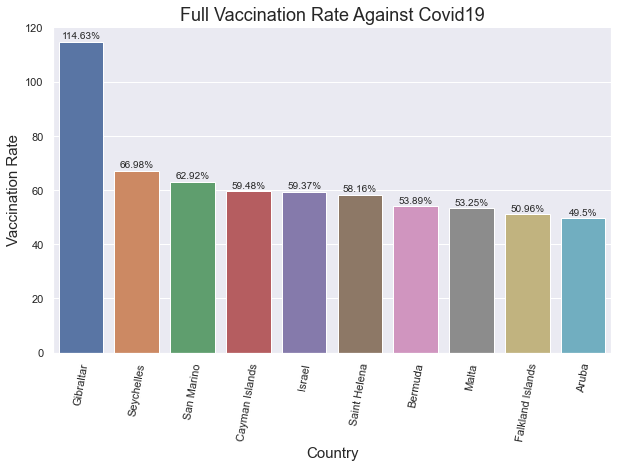

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='country', y='vaccination_rate', data=a, ax=ax)
plt.tick_params(axis='x', labelrotation=80)
plt.xlabel('Country', size=15)
plt.ylabel('Vaccination Rate', size=15)
plt.title('Full Vaccination Rate Against Covid19', size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=f"{round(y, 2):,}%",           # Format the text (value)
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=10,                            # text size
                textcoords='offset points')         # text coordinates

plt.show()